<a href="https://colab.research.google.com/github/athanoid/pythia-forecast/blob/main/yfinance_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install yfinance


In [9]:
pip install fbprophet

In [3]:
"""
Created on Sun Jun 14 14:40:11 2020

@author: thanos
"""
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
#define the ticker symbol
'''
TWTR
AMD
ATVI
EA
EBAY
TSLA
INTC
FB
NFLX
AMZN
AAPL
'''

tickerSymbol = 'TSLA'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [15]:
# get todays date
from datetime import date
today = date.today()
d = today.strftime("%Y-%m-%d")
print(d)

2021-01-31


In [6]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2010-1-1', end=d)

#see your data
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...
2021-01-25,855.000000,900.400024,838.820007,880.799988,41173400,0,0.0
2021-01-26,891.380005,895.900024,871.599976,883.090027,23131600,0,0.0
2021-01-27,870.349976,891.500000,858.659973,864.159973,27334000,0,0.0


In [10]:
# create feature vector
data = [tickerDf.index,tickerDf['Close']]
df = pd.DataFrame(data)
df = df.transpose()
df.columns = ['ds', 'y']

In [11]:
#fit model with fbprophet
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(df) # fit the model using all data

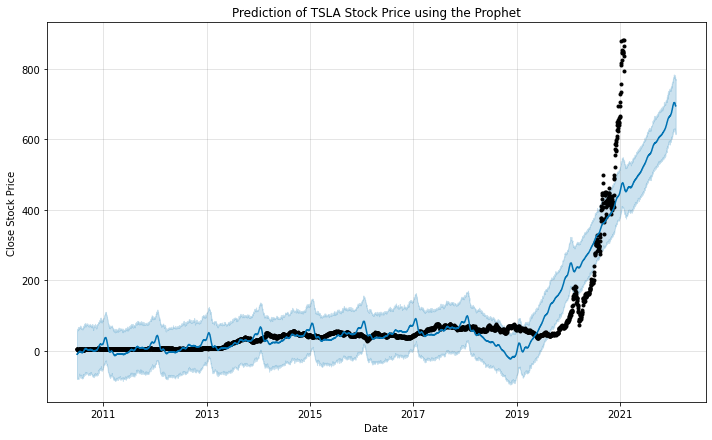

In [12]:
# plot future days
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of "+tickerSymbol+" Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

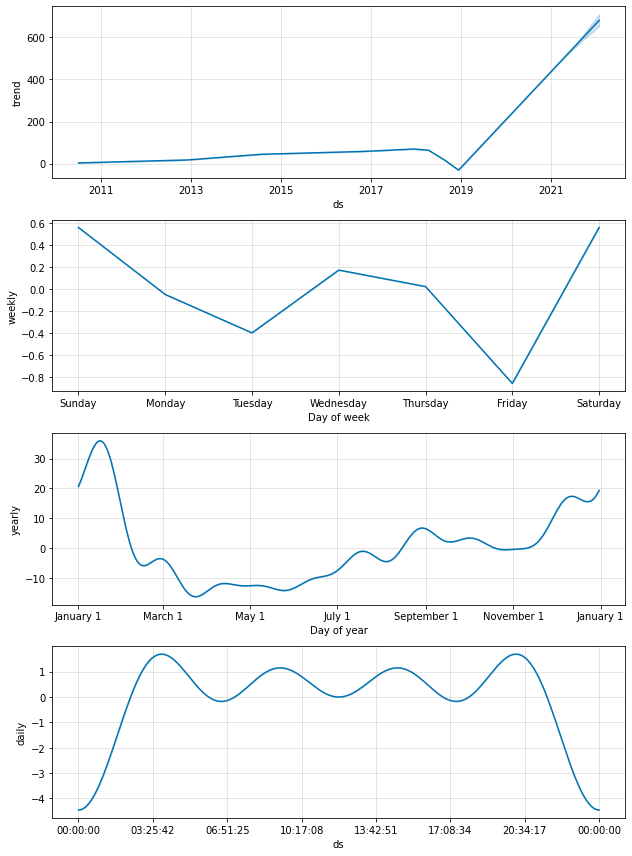

In [13]:
#plot trends
m.plot_components(prediction)
plt.show()